# Crimes against women in India

Harsimran Kaur

siminehal21@gmail.com


This project contains the data record of all types of crime against women in india in the span of year 2001-2014.

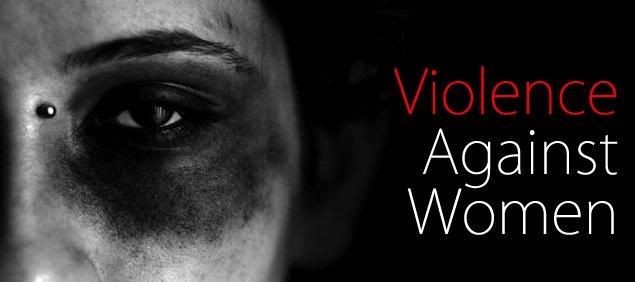

### Aim of the project

Main aim of working on this project is to reflect the situation of women in our society and raise concern about this matter.

In [1]:
# Installing required libraries 
!pip install seaborn 
!pip install matplotlib
!pip install pandas

In [2]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Data

Reading the csv file

In [11]:
crimes_df = pd.read_csv('C:\\Users\\1\\Downloads\\crimes_against_women_2001-2014.csv')
crimes_df.head()

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


Let us find out the number of rows and columns in our data.

In [12]:
crimes_df.shape

(10677, 11)

# Data Preparation and Cleaning

### 1) Checking null values
Find out if any of the columns have any Null or missing values.

In [13]:
null_crime = crimes_df.isna().sum()
null_crime

Unnamed: 0                                             0
STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

None of the column has any Null values.

### 2) Dropping the unnecessary data

 Let's find the total number of 'Unique' districts, where the crimes have been committed
 
 

In [14]:
distt=len(crimes_df['DISTRICT'].unique())
distt

1605

But there are total 748 districts in India, which means there is messy or false datas in a huge amount.

In this case, we better drop the column "District" and also "Unnamed: 0", as it is of no use, in our data analysis process.

In [15]:
crimes_df.drop(['DISTRICT', 'Unnamed: 0'], axis = 1, inplace=True)

#checking the remaining columns
crimes_df.columns

Index(['STATE/UT', 'Year', 'Rape', 'Kidnapping and Abduction', 'Dowry Deaths',
       'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

### 3) Renaming the column names.
As it is very inconvenient to write the lengthy names of these columns everytime, it would be better to give them short and convenient names.

In [16]:
crimes_df.rename( columns = {'Kidnapping and Abduction':'Kidnap_Abduct','Dowry Deaths':'Dowry_Deaths',
                             'Assault on women with intent to outrage her modesty':'Assault_on_women',
                             'Insult to modesty of Women':'Insulting_womens_modesty',
                             'Cruelty by Husband or his Relatives':'Domestic_Cruelty',
                             'Importation of Girls':'Importation_of_Girls'}, inplace = True)
crimes_df.head()

,STATE/UT,Year,Rape,Kidnap_Abduct,Dowry_Deaths,Assault_on_women,Insulting_womens_modesty,Domestic_Cruelty,Importation_of_Girls
0,ANDHRA PRADESH,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,2001,23,26,12,109,58,247,0


### 4) Cleaning the repeated data

Let's find out the names of all the states/UT where the crimes have been committed

In [17]:
crimes_df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY',
       'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli',
       '

We can see from above that there is lot of repeated data, like some of them are repeated again by using capital letters (like Andhra Pradesh) and some of them have issues with space too(like A&N Islands) and also Delhi has been repeated again by mentioning it as Delhi UT

In [18]:
# Firstly, we make sure that all the values of 'state/ut' column are in uppercase, so as to remove duplicate values.
def remove_uppercase(row):
    state = row['STATE/UT'].strip()
    state = state.upper()
    return state
state_series = crimes_df.apply(remove_uppercase, axis=1)
crimes_df['STATE/UT']=state_series

# Now, we'll replace the other type of repeated datas as dicussed above
crimes_df['STATE/UT'].replace("A&N ISLANDS","A & N ISLANDS", inplace = True)
crimes_df['STATE/UT'].replace("D&N HAVELI", "D & N HAVELI", inplace = True)
crimes_df['STATE/UT'].replace("DELHI UT", "DELHI", inplace = True)

# unique data length
"The total number of States+UT : " + str(len(crimes_df['STATE/UT'].unique()))

'The total number of States+UT : 36'

 Which is coming out perfect, hence we are done with our data cleaning process of our dataset

# Exploratory Analysis and Visualization

In [19]:
# Making list of all columns names for further use
crime_name=list(crimes_df.columns)[2:]

Let us find out the population of women over the years, 2001-2014, who has been a victim of different crimes based on their gender.

In [20]:
victims=crimes_df[crime_name].sum()
victims

Rape                         619158
Kidnap_Abduct                746198
Dowry_Deaths                 215480
Assault_on_women            1212258
Insulting_womens_modesty     292756
Domestic_Cruelty            2233888
Importation_of_Girls           1872
dtype: int64

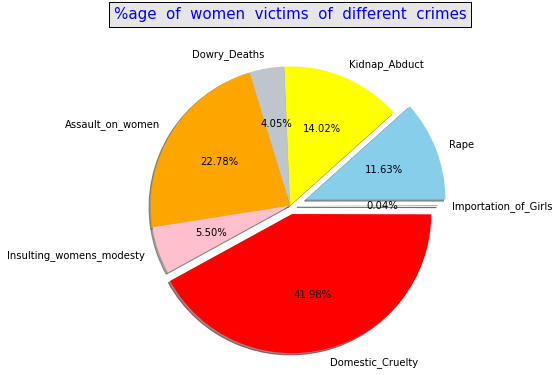

In [21]:
plt.pie(victims,radius=1.6,labels=crime_name,autopct='%0.2f%%',shadow=True,explode=[0.2,0,0,0,0,0.1,0.1],colors=['skyblue','yellow','#BCC6CC','orange','pink','red','black'])
plt.title("%age  of  women  victims  of  different  crimes",bbox={'facecolor':'0.9','pad':5},pad=78,color='b',size=15)
plt.show()

Finding total women victims

In [22]:
total_victims=victims.sum()
total_victims

5321610

This above analysis potrays a heartbreaking situation of women in our society, as more than 5 million number of females, over the years 2001-2014, have been a victim of assault, violance, rape or even death, in India alone.  

#### Another ways to analyze different crimes committed every year separately.

,Year,Rape,Kidnap_Abduct,Dowry_Deaths,Assault_on_women,Insulting_womens_modesty,Domestic_Cruelty,Importation_of_Girls
0,2001,32150,29290,13702,68248,19492,98340,228
1,2002,32746,29012,13644,67886,20310,98474,152
2,2003,31694,26592,12416,65878,24650,101406,92
3,2004,36466,31156,14052,69134,20002,116242,178
4,2005,36718,31500,13574,68350,19968,116638,298
5,2006,38696,34828,15236,73234,19932,126256,134
6,2007,41474,40832,16186,77468,21900,151860,122
7,2008,42934,45878,16344,80826,24428,162688,134
8,2009,42794,51482,16766,77422,22018,179092,96
9,2010,44344,59590,16782,81226,19922,188082,72


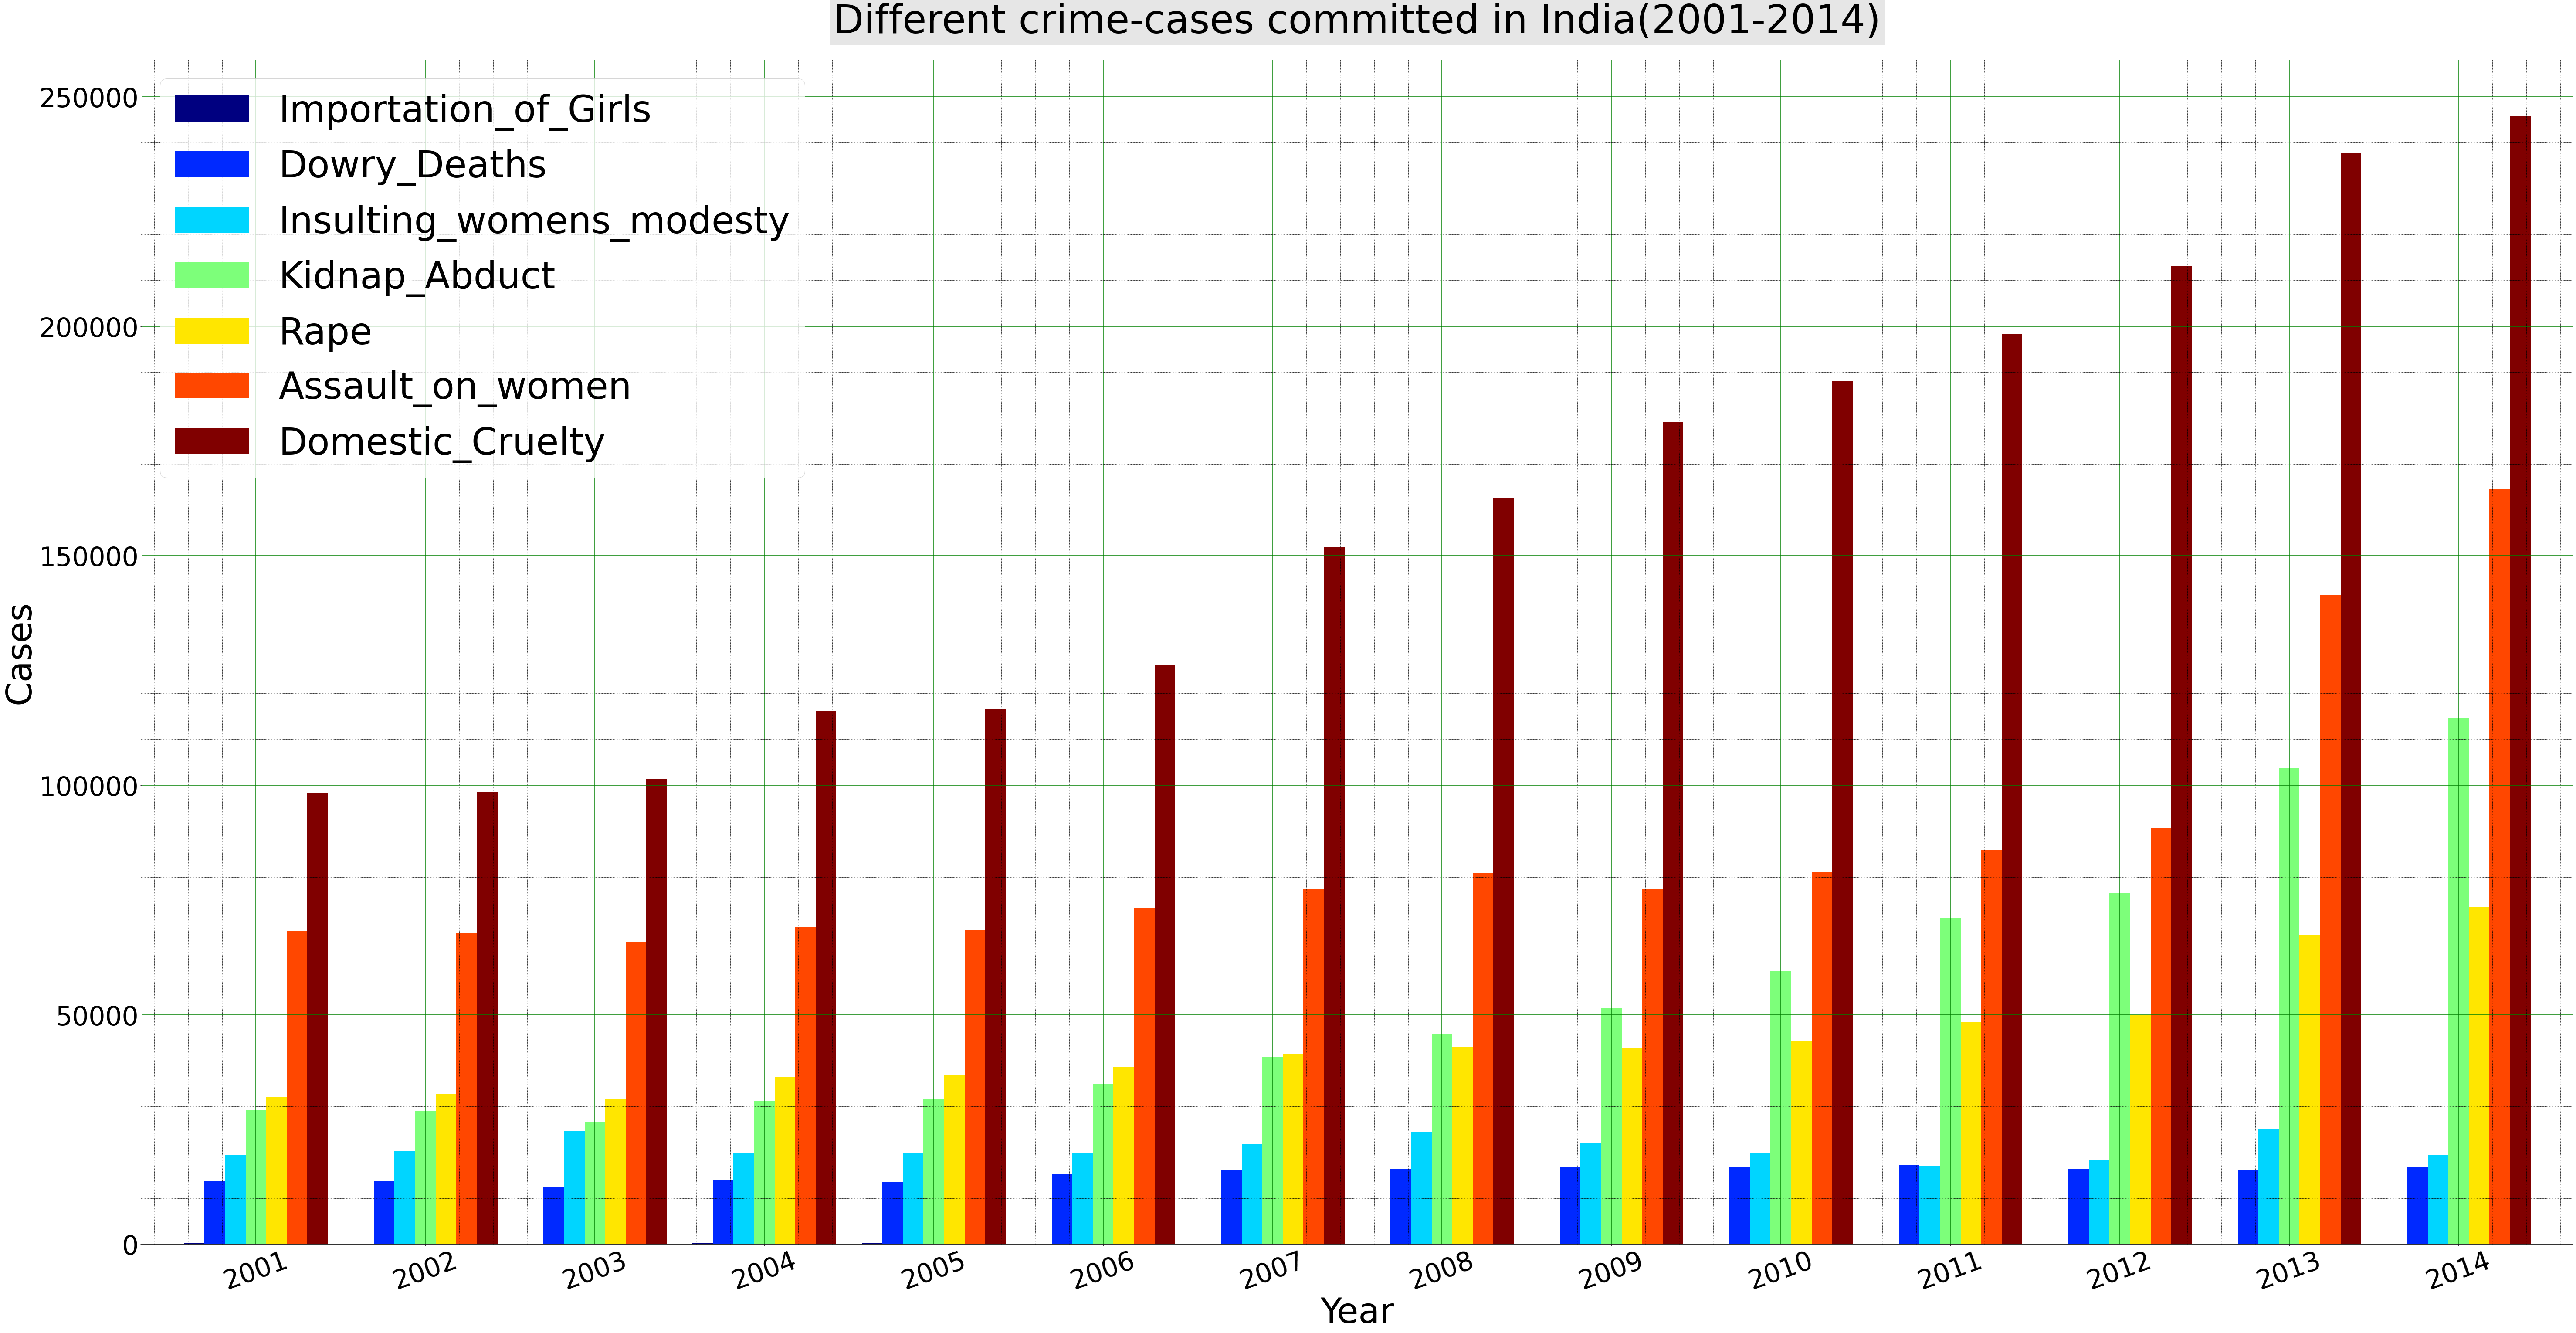

In [23]:
# Preparing the dataframe
df=crimes_df.groupby("Year")[crime_name].sum()
sum_df=df.reset_index()
order=['Importation_of_Girls','Dowry_Deaths','Insulting_womens_modesty','Kidnap_Abduct','Rape','Assault_on_women','Domestic_Cruelty']

# Plotting the figure
fig, ax = plt.subplots(1,1,figsize=(100,50))
sum_df.plot(x='Year',y=order,ax=ax,rot=20,width=0.85,kind='bar',colormap='jet')

# Adjusting the size of labels
plt.title("Different crime-cases committed in India(2001-2014)",fontsize=90,bbox={'facecolor':'0.9','pad':9},pad=62)
plt.xlabel("Year",fontsize=80)
plt.ylabel("Cases",fontsize=80)
plt.tick_params(labelsize=60)

# Making gridlines
plt.minorticks_on()
plt.grid(which='major',color='g',linestyle='-',linewidth='1.5')
plt.grid(which='minor',color='k',linestyle=':',linewidth='0.9')

plt.legend(fontsize=85);
sum_df

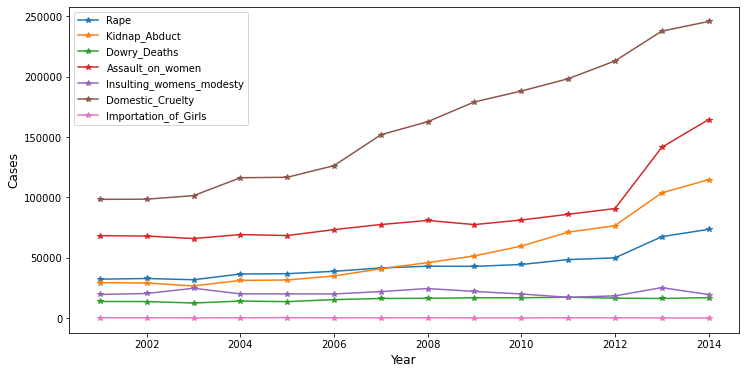

In [24]:
df.plot(figsize=(12,6),marker='*')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Cases',fontsize=12)
plt.show()

We come to know that domestic cruelty is the biggest threat to women's safety in India,and it is increasing rapidly.
Secondly, importation of girls is negligible as compared to other crimes.
#### Now let us analyse the all the cases separately by using bar graph. 

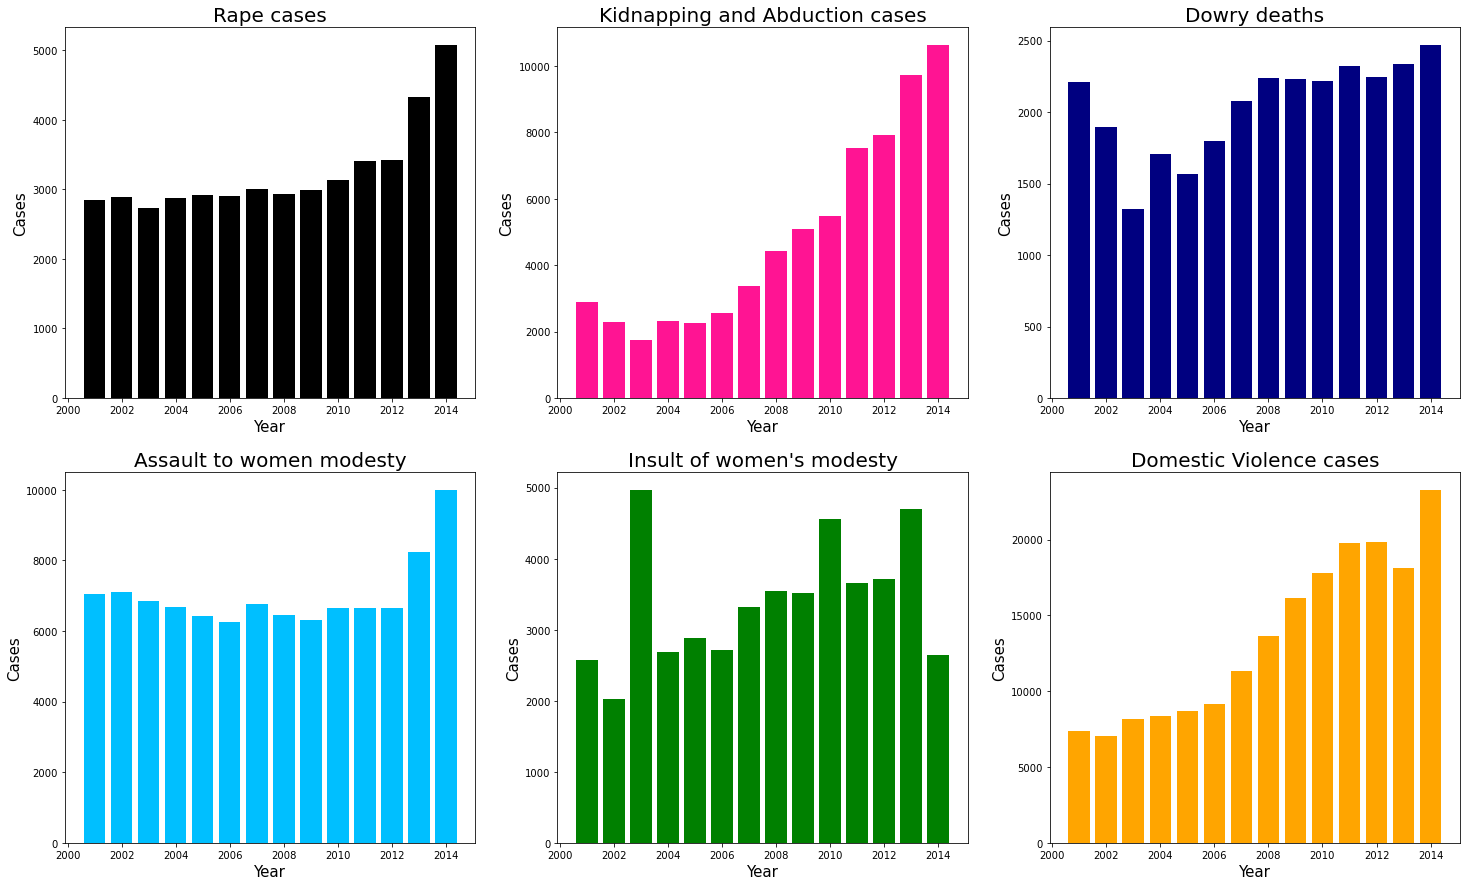

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(25, 15))

axes[0,0].set_xlabel('Year',fontsize=15)
axes[0,0].set_ylabel('Cases',fontsize=15)
axes[0,0].set_title("Rape cases",fontsize=20)
axes[0,0].bar(crimes_df.Year, crimes_df.Rape,color='black')

axes[0,1].set_xlabel('Year',fontsize=15)
axes[0,1].set_ylabel('Cases',fontsize=15)
axes[0,1].set_title("Kidnapping and Abduction cases",fontsize=20)
axes[0,1].bar(crimes_df.Year, crimes_df.Kidnap_Abduct, color = 'deeppink')

axes[0,2].set_xlabel('Year',fontsize=15)
axes[0,2].set_ylabel('Cases',fontsize=15)
axes[0,2].set_title("Dowry deaths",fontsize=20)
axes[0,2].bar(crimes_df.Year, crimes_df.Dowry_Deaths, color = 'navy')

axes[1,0].set_xlabel('Year',fontsize=15)
axes[1,0].set_ylabel('Cases',fontsize=15)
axes[1,0].set_title("Assault to women modesty",fontsize=20)
axes[1,0].bar(crimes_df.Year, crimes_df.Assault_on_women, color = 'deepskyblue')

axes[1,1].set_xlabel('Year',fontsize=15)
axes[1,1].set_ylabel('Cases',fontsize=15)
axes[1,1].set_title("Insult of women's modesty",fontsize=20)
axes[1,1].bar(crimes_df.Year, crimes_df.Insulting_womens_modesty, color = 'green')

axes[1,2].set_xlabel('Year',fontsize=15)
axes[1,2].set_ylabel('Cases',fontsize=15)
axes[1,2].set_title("Domestic Violence cases",fontsize=20)
axes[1,2].bar(crimes_df.Year, crimes_df.Domestic_Cruelty, color = 'orange') 

plt.show()

### There are two things to be concluded from the above bar chart -
1) The cases have increased over the years.

2) 2014 was the year, when violance against women was reported the maximum.

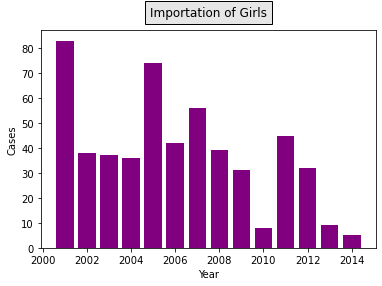

In [26]:
plt.bar(crimes_df.Year, crimes_df.Importation_of_Girls, color = 'purple')
plt.title("Importation of Girls",bbox={'facecolor':'0.9','pad':5},pad=14)
plt.xlabel('Year') 
plt.ylabel('Cases')
plt.show()

This graph depicts that Importation of girls is much less in 2014 as compared to 2001.

#### Let us have a look on how more cases from each state started coming up more frequently with each passing year.

In [27]:
count_df = crimes_df.groupby('Year')[['STATE/UT']].count()
count_df

,STATE/UT
Year,
2001,716
2002,719
2003,728
2004,729
2005,733
2006,740
2007,743
2008,761
2009,767


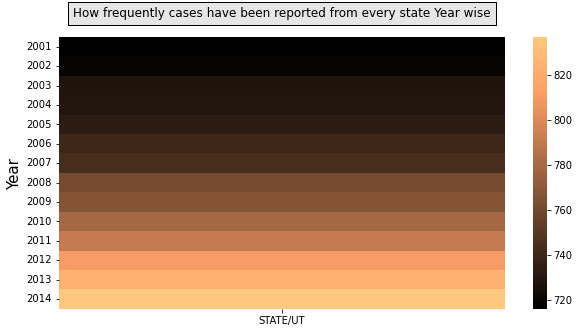

In [28]:
# Let us use seaborn to draw the heatmap 
plt.figure(figsize=(10,5))
plt.ylabel('Year',fontsize=15)
plt.title("How frequently cases have been reported from every state Year wise",bbox={'facecolor':'0.9','pad':5},pad=20)
sns.heatmap(count_df,cmap='copper');

This heatmap shows how states' names started appearing  more frequently on the dataset, for reporting crimes and sadly the crime only increased with the passing year.

It gives us the conclusion that overall(cases under each category), from every state, has increased with time, not decreased.

# Asking and Answering Questions

As part of this data analysis, it is very crucial to raise question and find answer to them. Here we will try to find out some of the most essential questions, that will help us in drawing a major conclusion from our dataset.

### Q1) List of Indian states and union territories ranking by safety of women in the span of 2001-2014.

In [29]:
state_df=crimes_df.groupby('STATE/UT')[crime_name].sum().sum(axis=1).sort_values()
df1=state_df.to_frame().rename(columns={0:'crimes_in_state'})
df1.reset_index(inplace=True)
df1

,STATE/UT,crimes_in_state
0,LAKSHADWEEP,54
1,DAMAN & DIU,230
2,D & N HAVELI,566
3,NAGALAND,1072
4,SIKKIM,1482
5,A & N ISLANDS,1568
6,PUDUCHERRY,2718
7,GOA,4124
8,MIZORAM,4306
9,ARUNACHAL PRADESH,5312


This list shows that UP was most prone to women crimes in India in the period of 2001-2014 and Lakshadweep was the safest place.

### Q2) Which were the  top five dangerous states for women in India ?

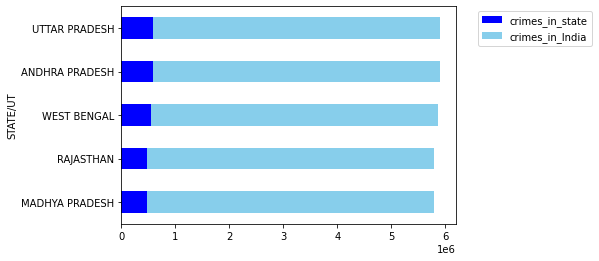

,STATE/UT,crimes_in_state,crimes_in_India
31,MADHYA PRADESH,467086,5321610
32,RAJASTHAN,470186,5321610
33,WEST BENGAL,537976,5321610
34,ANDHRA PRADESH,575354,5321610
35,UTTAR PRADESH,582398,5321610


In [30]:
li=[df1.crimes_in_state.sum()]*5
df2=df1.tail()
df2.insert(2,'crimes_in_India',li)
df2.plot(x='STATE/UT',kind='barh',stacked=True,color=['blue','skyblue'])
plt.legend(bbox_to_anchor=(1.05,1.0))
plt.show()
df2

This graph shows the fraction of crime cases committed in top 5 dangerous states out of total crime-cases reported in all over India in span of 2001-2014.

### Q3) Which were the top ten reported rape cases in India and in which year and place they occured?

In [31]:
max_rape_cases = crimes_df.sort_values('Rape', ascending = False).head(10)
rdf=max_rape_cases[['Year','STATE/UT','Rape']]
rdf.index=np.arange(1,11)
rdf

,Year,STATE/UT,Rape
1,2014,MADHYA PRADESH,5076
2,2013,MADHYA PRADESH,4335
3,2014,RAJASTHAN,3759
4,2014,UTTAR PRADESH,3467
5,2014,MAHARASHTRA,3438
6,2012,MADHYA PRADESH,3425
7,2011,MADHYA PRADESH,3406
8,2013,RAJASTHAN,3285
9,2010,MADHYA PRADESH,3135
10,2013,MAHARASHTRA,3063


We see from the analysis, the top states that reported the maximum number of rape cases, along with the year, in which they occured.

Madhya Pradesh reported the maximum rape cases in the year 2014.

### Q4) Which were the top ten reported  cases of dowry deaths in India and in which year and place they occured?

In [32]:
max_dowry_death_cases = crimes_df.sort_values('Dowry_Deaths', ascending = False).head(10)
ddf=max_dowry_death_cases[['Year','STATE/UT','Dowry_Deaths']]
ddf.index=np.arange(1,11)
ddf

,Year,STATE/UT,Dowry_Deaths
1,2014,UTTAR PRADESH,2469
2,2013,UTTAR PRADESH,2335
3,2011,UTTAR PRADESH,2322
4,2012,UTTAR PRADESH,2244
5,2008,UTTAR PRADESH,2237
6,2009,UTTAR PRADESH,2232
7,2010,UTTAR PRADESH,2217
8,2001,UTTAR PRADESH,2211
9,2007,UTTAR PRADESH,2076
10,2002,UTTAR PRADESH,1893


From our analysis, we observe that the highest reported dowry death was in Uttar Pradesh in 2014, with number of reports being 2469.

One more point to be observed as well is that, Uttar Pradesh is the ONLY state that appears in this list.

### Q5) Which were the top ten reported  cases of domestic violence in India and in which year and place they occured?

In [33]:
max_domestic_violance_cases = crimes_df.sort_values('Domestic_Cruelty', ascending = False).head(10)
vdf=max_domestic_violance_cases[['Year','STATE/UT','Domestic_Cruelty']]
vdf.index=np.arange(1,11)
vdf

,Year,STATE/UT,Domestic_Cruelty
1,2014,WEST BENGAL,23278
2,2012,WEST BENGAL,19865
3,2011,WEST BENGAL,19772
4,2013,WEST BENGAL,18116
5,2010,WEST BENGAL,17796
6,2009,WEST BENGAL,16112
7,2014,RAJASTHAN,15905
8,2013,RAJASTHAN,15094
9,2013,ANDHRA PRADESH,15084
10,2008,WEST BENGAL,13663


According to our analysis, we see the maximum cases of Domestic Violance cases came from West Bengal in the year 2014, with number of cases reported being 23278.

### Q6) Which were the top ten reported  cases of importation of women in India and in which year and place they occured?

In [34]:
max_importation_case = crimes_df.sort_values('Importation_of_Girls', ascending = False).head(10)
idf=max_importation_case[['Year','STATE/UT','Importation_of_Girls']]
idf.index=np.arange(1,11)
idf

,Year,STATE/UT,Importation_of_Girls
1,2001,BIHAR,83
2,2005,BIHAR,74
3,2005,WEST BENGAL,61
4,2005,WEST BENGAL,60
5,2007,BIHAR,56
6,2005,BIHAR,48
7,2011,MADHYA PRADESH,45
8,2006,BIHAR,42
9,2001,BIHAR,39
10,2008,JHARKHAND,39


According to our analysis, maximum of Importation of girls has been reported in Bihar in the year 2011

### Q7)  Find out the total number of cases, in span of 2001-2014 under each category, state wise.

In [35]:
counts_df = crimes_df.groupby('STATE/UT')[crime_name].sum()
counts_df

,Rape,Kidnap_Abduct,Dowry_Deaths,Assault_on_women,Insulting_womens_modesty,Domestic_Cruelty,Importation_of_Girls
STATE/UT,,,,,,,
A & N ISLANDS,336,212,20,600,112,288,0
ANDHRA PRADESH,32150,34504,13844,126952,86964,280906,34
ARUNACHAL PRADESH,1316,1470,6,1996,48,476,0
ASSAM,40190,62074,3268,38256,254,115300,22
BIHAR,30758,57086,32206,16958,694,69770,904
CHANDIGARH,770,1682,90,1088,342,2080,0
CHHATTISGARH,29308,11808,2758,47096,3968,23436,12
D & N HAVELI,132,224,2,106,12,90,0
DAMAN & DIU,60,44,6,40,4,76,0


### Q8) Find total number of  cases of domestic violence and women assault appeared in India from 2001 to 2014.

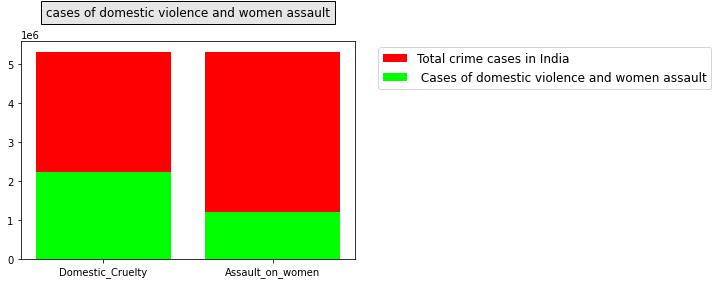

In [36]:
dc=crimes_df['Domestic_Cruelty'].sum()
wa=crimes_df['Assault_on_women'].sum()
tc=crimes_df[crime_name].sum().sum()

plt.title("cases of domestic violence and women assault",bbox={'facecolor':'0.9','pad':5},pad=25)
plt.bar(['Domestic_Cruelty','Assault_on_women'],[tc,tc],color=['r','r']);
plt.bar(['Domestic_Cruelty','Assault_on_women'],[dc,wa],color=['lime','lime'])
plt.legend(['Total crime cases in India',' Cases of domestic violence and women assault'],bbox_to_anchor=(1.05,1.0),fontsize='larger')

### Q9)  Which state has featured in both the lists of "Maximum number of rape cases" and "Maximum number of Importation cases"?

In [37]:
max_importation_case = max_importation_case.merge(max_rape_cases)
max_importation_case

,STATE/UT,Year,Rape,Kidnap_Abduct,Dowry_Deaths,Assault_on_women,Insulting_womens_modesty,Domestic_Cruelty,Importation_of_Girls
0,MADHYA PRADESH,2011,3406,1088,811,6665,762,3732,45


It is Madhya Pradesh, who has maximum cases reported in both the categories.

### Q10) Which state has featured in both the lists of "Maximum number of rape cases" and "Maximum number of Deaths due to Dowry cases"?

In [38]:
max_dowry_death_cases = max_dowry_death_cases.merge(max_rape_cases)
max_dowry_death_cases

,STATE/UT,Year,Rape,Kidnap_Abduct,Dowry_Deaths,Assault_on_women,Insulting_womens_modesty,Domestic_Cruelty,Importation_of_Girls
0,UTTAR PRADESH,2014,3467,10626,2469,8605,29,10471,0


We conclude, it is Uttar Pradesh, who has reported maximum cases in both the given categories.

# Inferences and Conclusion

#### The main aim of the project was to analyse the situation of women in the year 2001-2014. 
#### We also did a deep analysis through charts and by raising important questions. Let us go through some of the important analysis, we have done through this project -
            
          1) More than 5 million females has been a victim of some or other type of Violance, based on their gender,
             starting from rape to importing them for buisness.
          
          2) We summarised the TOTAL number of cases happening, in 2001-2014, by each state and also found out the top
             5 states where maximum number of TOTAL cases has been reported from 2001-2014,state wise.
          
          3) We tried finding out the top 10 highest cases reported ever, along with year and state in which crime has
             been committed,where, Madhya Pradesh having highest number of cases of rape in 2014, Uttar Pradesh having 
             highest cases in Dowry death in 2014, West Bengal having highest cases in Domestic Violance in 2014 and
             Bihar having the highest cases in importaion of girls in 2011.
          
          4) We concluded from the series of bar graphs that 2014 was the year, when crimes were reported the highest
             under each category.
          
          5) We also merged the data in two different cases, first one being "Maximum number of rape cases" and 
             "Maximum number of Importation cases", where we found out it is Madhya Pradesh and in second one being
             "Maximum number of rape cases" and "Maximum number of Deaths due to Dowry cases", which we concluded to 
             be Uttar Pradesh.
          
#### We concluded that crimes against women has been on increase

# References and Future Work

### References:

The Starter Notebook: https://jovian.ml/aakashns/zerotopandas-course-project-starter

Numpy Documentation: https://numpy.org/devdocs/user/quickstart.html

User guide for Pandas: https://pandas.pydata.org/docs/user_guide/index.html

Seaborn gallery: https://seaborn.pydata.org/examples/index.html

Matplotlib gallery: https://matplotlib.org/3.1.1/gallery/index.html

### Future Work:

I want to work more on the topic of Women's safety in our society and also would do the analysis on same type of datset, but that will not be bound to any specific country but whole world in general!